In [1]:
from session_7 import create_cifar10_dataloaders, MetricsCallback, Model1
import matplotlib.pyplot as plt
from torchvision import transforms
from torchsummary import summary

import lightning as L
from lightning.pytorch.callbacks import TQDMProgressBar

In [2]:
L.seed_everything(0, workers=True)
model = Model1()
summary(model, input_size=(3, 32, 32))

Seed set to 0


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
      Conv2dWithBN-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,320
       BatchNorm2d-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
      Conv2dWithBN-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 16, 16]           1,040
      BatchNorm2d-10           [-1, 16, 16, 16]              32
             ReLU-11           [-1, 16, 16, 16]               0
     Conv2dWithBN-12           [-1, 16, 16, 16]               0
           Conv2d-13           [-1, 32, 16, 16]           4,640
      BatchNorm2d-14           [-1, 32,

In [3]:
train_loader, test_loader = create_cifar10_dataloaders(
    batch_size=64,
    data_path="../data",
    train_transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(
                (0.49139968, 0.48215841, 0.44653091),
                (0.24703223, 0.24348513, 0.26158784),
            ),
        ]
    ),
    test_transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(
                (0.49139968, 0.48215841, 0.44653091),
                (0.24703223, 0.24348513, 0.26158784),
            ),
        ]
    ),
)

In [4]:
metrics = MetricsCallback()
trainer = L.Trainer(
    max_epochs=20,
    logger=False,
    enable_checkpointing=False,
    callbacks=[TQDMProgressBar(leave=True), metrics],
)
trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=test_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | block1    | Sequential         | 3.9 K  | train
1 | block2    | Sequential         | 27.5 K | train
2 | block3    | Sequential         | 61.5 K | train
3 | train_acc | MulticlassAccuracy | 0      | train
4 | val_acc   | MulticlassAccuracy | 0      | train
---------------------------------------------------------
92.9 K    Trainable params
0         Non-trainable params
92.9 K    Total params
0.371     Total estimated model params size (MB)
43        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]                                
Epoch 19: 100%|██████████| 782/782 [00:05<00:00, 152.93it/s, val_loss=1.080, val_acc=0.672, train_loss=0.452, train_acc=0.842]

`Trainer.fit` stopped: `max_epochs=20` reached.


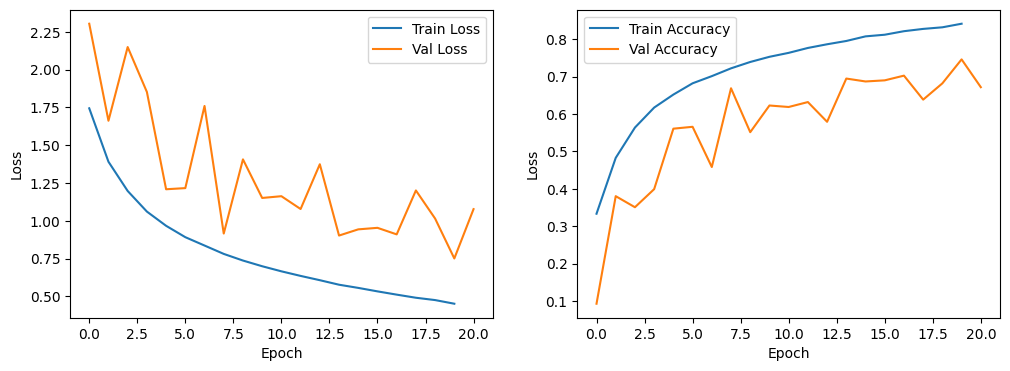

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
metrics.plot_loss(ax1)
metrics.plot_accuracy(ax2)
plt.show()

**Target**

Build a naive skeleton, get RF to 44 and parameter count < 200k

**Result**

Took the model from the previous session assignment, and did the following:

1. Switched max pooling to strided convolutions
2. Channel sizes increase from 16 -> 32 -> 64 across blocks
3. No regularization

Parameter Count: 92,874

Train Accuracy: 84.2%

Test Accuracy: 67.2%

**Analysis**

Although got the correct RF and parameter count is less than 200k, the test accuracy and loss jumps all over the place, which indicates that the model is overfitting a lot (expected since regularization was removed). The model capacity might be sufficient, but its too soon to say. 

